In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("HouseData.csv")
# col = "price area bedrooms bathrooms stories".split()
# data = data[col]

# # sns.pairplot(data)
data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [24]:
missing_values = data.isna().sum() + data.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# New Section

In [25]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
X = data.drop("price", axis=1)  # Features (all columns except 'price')
y = data["price"]  # Target variable ('price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
meu = np.mean(X_train["area"])
sigma = np.std(X_train["area"])

X_train["area"] = (X_train["area"] - meu) / sigma


X_test["area"] = (X_test["area"] - meu) / sigma




In [27]:
# Calculate Q1 and Q3
Q1 = X_train['area'].quantile(0.25)
Q3 = X_train['area'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
X_train_filtered = X_train[(X_train['area'] >= lower_bound) & (X_train['area'] <= upper_bound)]
X_test_filtered = X_test[(X_test['area'] >= lower_bound) & (X_test['area'] <= upper_bound)]
y_train_filtered = y_train.loc[X_train_filtered.index]
y_test_filtered = y_test.loc[X_test_filtered.index]

# Optionally, you can reset the index of the filtered DataFrames
X_train_filtered.reset_index(drop=True, inplace=True)
X_test_filtered.reset_index(drop=True, inplace=True)
y_train_filtered.reset_index(drop=True, inplace=True)
y_test_filtered.reset_index(drop=True, inplace=True)



In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(X_train_filtered['area'], kde=True, bins=30, color='blue')

plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Distribution of Area')

plt.show()

In [28]:
X_train = X_train_filtered
X_test = X_test_filtered
y_train = y_train_filtered
y_test= y_test_filtered

<Axes: xlabel='area', ylabel='bedrooms'>

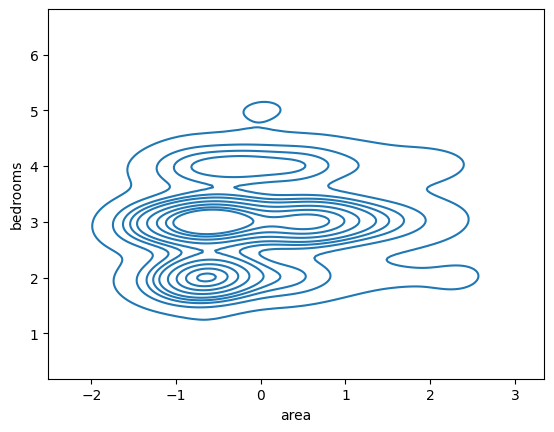

In [29]:
sns.kdeplot(x=X_train["area"], y=X_train["bedrooms"])

<Axes: ylabel='area'>

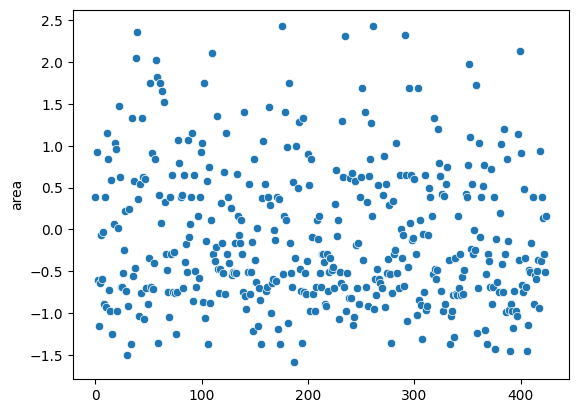

In [30]:
sns.scatterplot(X_train["area"])

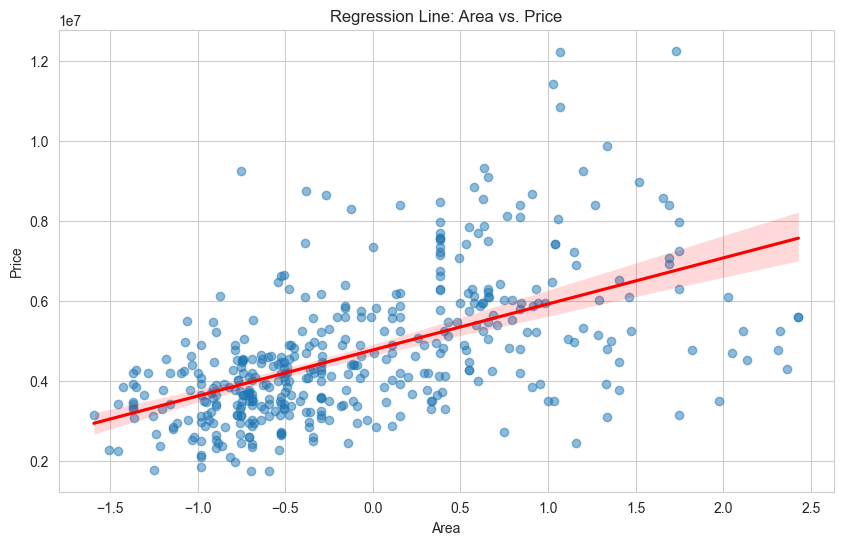

In [52]:
plt.figure(figsize=(10, 6))
sns.regplot(x='area', y='price', data=pd.concat([X_train, y_train], axis=1), scatter_kws={'alpha':0.5}, line_kws={'color':'red'})


plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line: Area vs. Price')

plt.show()

In [53]:
def function(w,b,x):
    p = np.dot(w,x)+b
    return p

In [65]:
n = X_train.shape[1]


w = np.zeros(n)
b=0

print("w:", w)
print("b:", b)



w: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b: 0


In [66]:
function(w,b,X_train.iloc[0])

0.0

In [67]:
def cost(w,b,x,y):
    m = x.shape[0]
    mcost =0
    for i in range(m):
        f_wb_i = function(w,b,x.iloc[i])
        y_act = y.iloc[i]
        mcost += (f_wb_i-y_act)**2
    total_cost = mcost/(2*m)
    return total_cost

In [68]:
cost(w,b,X_train,y_train)

12405545014386.588

In [70]:
def derivative(w, b, x, y):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        f_wb_i = function(w, b, x.iloc[i])
        y_act = y.iloc[i]
        error = f_wb_i - y_act
        for j in range(n):
            dj_dw[j] += error * x.iloc[i][j]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [71]:
dj_dw, dj_db = derivative(w, b, X_train, y_train)

In [72]:
def gd(w,b,x,alpha = 0.01,num_iter = 100):
    for i in range(num_iter):
        dj_dw, dj_db = derivative(w, b, X_train, y_train)
        w -= (alpha * dj_dw)
        b -= (alpha * dj_db)
    return w,b

In [52]:
w,b = gd(w,b,X_train,alpha = 0.00001,num_iter = 1000)

In [53]:
# before gd                           : 12617396203243.807
# 1. alpha = 0.00001,num_iter = 1000  :  1486185043989.0344
# 2. alpha = 0.00001,num_iter = 1000  :  1297705255630.5657
# 3. alpha = 0.00001,num_iter = 1000  :  1156965486471.085
# 4. alpha = 0.00001,num_iter = 1000  :  1080308529393.5585

In [73]:
print("w:", w)
print("b:", b)

w: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b: 0


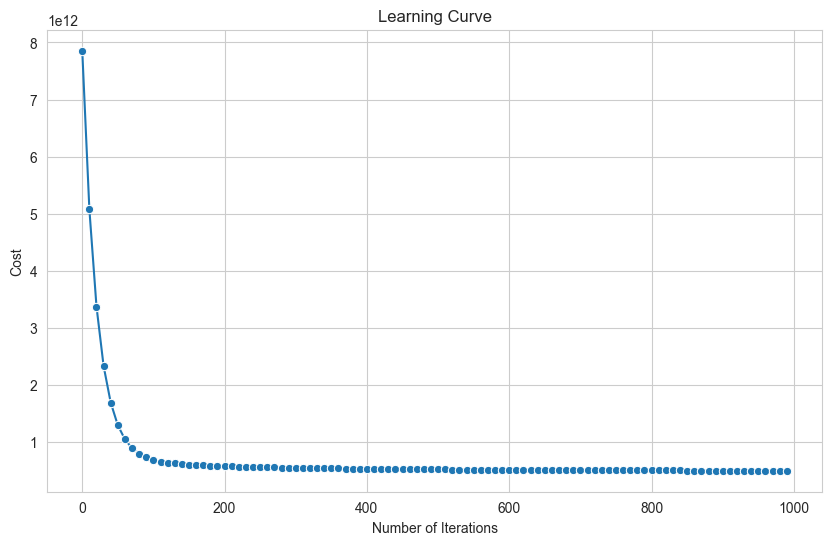

w: [556362.85166496 250401.3891707  988712.41170721 439259.05903556
 506434.29024463 248334.71370548 407337.89560898 216197.18866988
 612038.20828205 253192.12870746 531637.66489128 257562.70355038]
b: 559204.1403147139


In [74]:
costValues = []
iters = []
learning_rate = 0.1

for i in range(0, 1000, 10):
    iters.append(i)
    w, b = gd(w, b, X_train, alpha=learning_rate, num_iter=1)
    costValues.append(cost(w, b, X_train, y_train))

# Plotting the learning curve using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=iters, y=costValues, marker='o', linestyle='-')
plt.title('Learning Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

print("w:", w)
print("b:", b)

In [48]:
function(w,b,X_train.iloc[6])


3354532.4274366773

In [49]:
y_train.iloc[6]

1750000

In [59]:
4029168.3849860737-1750000

2279168.3849860737

In [77]:
y_pred = []
m = y_test.shape[0]
for i in range(m):
  y_pred.append(function(w,b,X_test.iloc[i]))

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6415956350013258